In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [2]:
csvpath = ("../csv/iris.csv")

In [3]:
dataset = pd.read_csv(csvpath)

In [4]:
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
dataset["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
dataset.shape

(150, 6)

In [7]:
dataset.drop("Id", axis = 1, inplace = True)

In [8]:
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


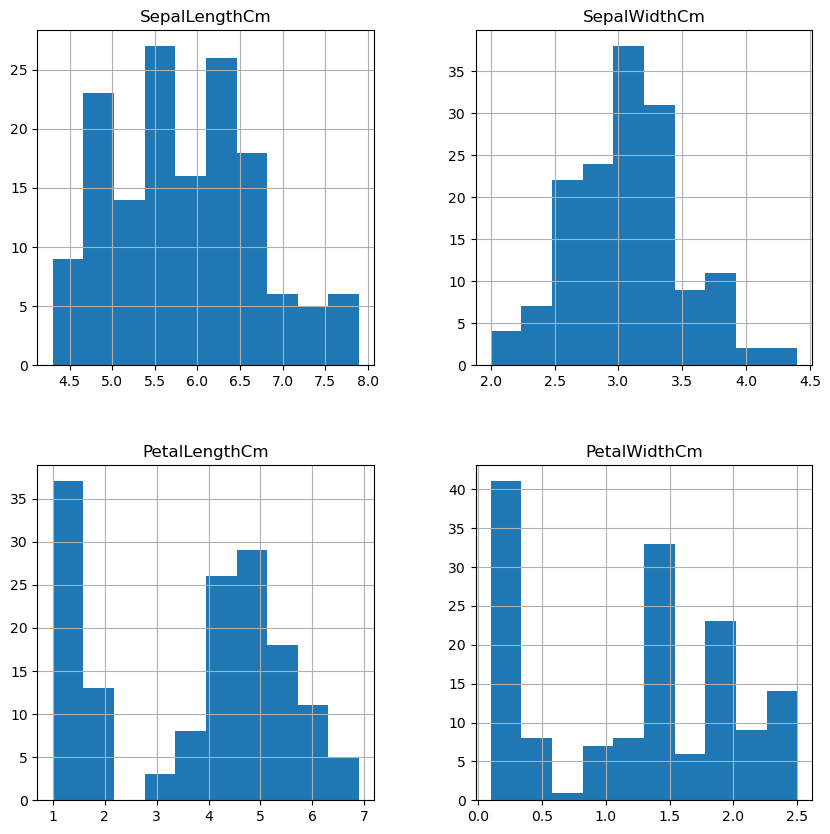

In [10]:
dataset.hist(figsize = (10, 10))
plt.show()

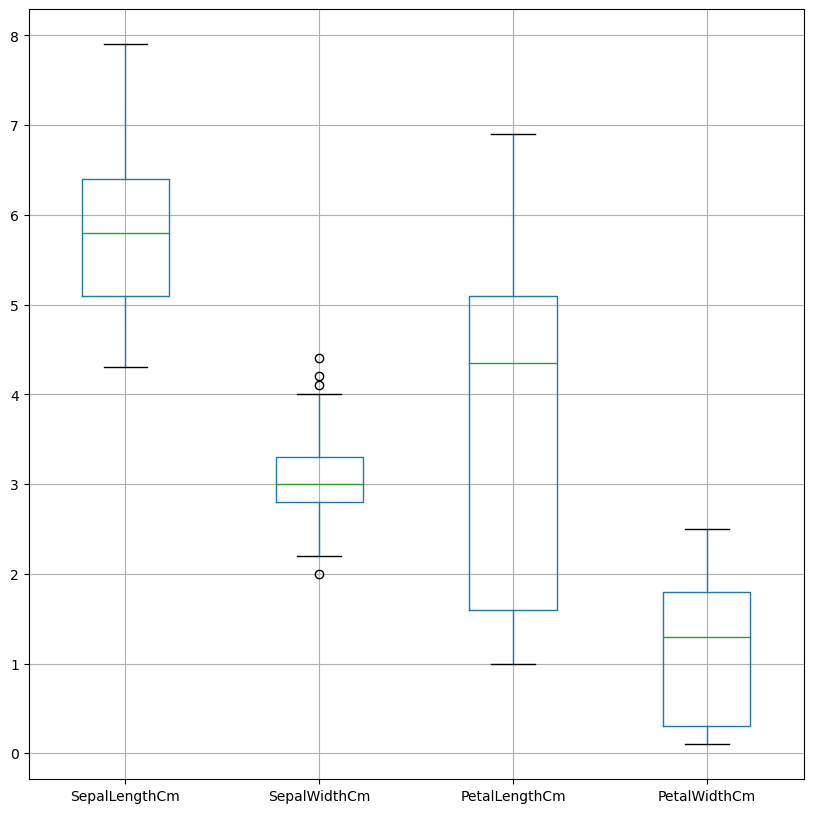

In [11]:
dataset.boxplot(figsize = (10, 10))
plt.show()

<Axes: >

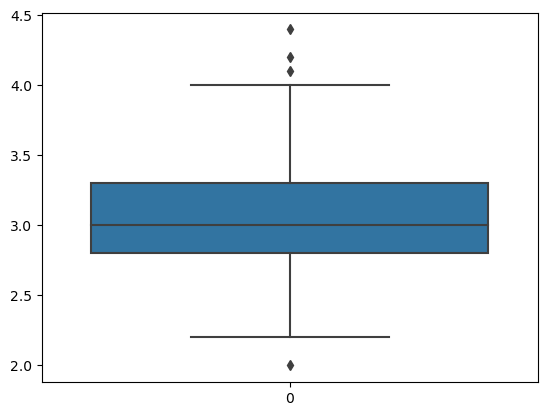

In [12]:
sns.boxplot(dataset["SepalWidthCm"])

In [13]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

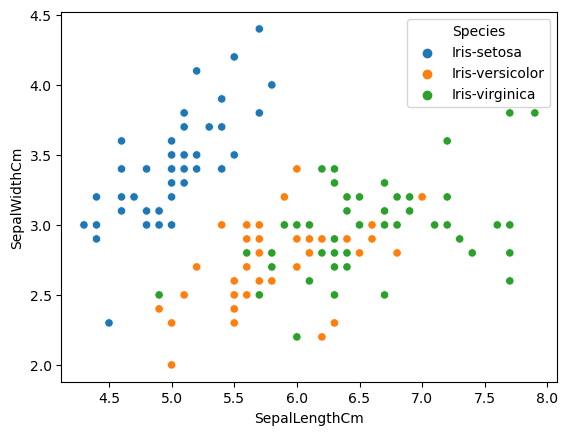

In [14]:
sns.scatterplot(x = dataset["SepalLengthCm"], y = dataset["SepalWidthCm"], hue = dataset["Species"]) 

Data Preprocessing

In [15]:
dataset.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

Split data into dependent and independent variables

In [16]:
X = dataset.drop("Species", axis= 1)

In [17]:
X


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
y = dataset["Species"]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [20]:
y_train.value_counts()/ len(y_train)

Iris-virginica     0.358333
Iris-setosa        0.333333
Iris-versicolor    0.308333
Name: Species, dtype: float64

In [21]:
y_train

58     Iris-versicolor
97     Iris-versicolor
129     Iris-virginica
114     Iris-virginica
146     Iris-virginica
            ...       
113     Iris-virginica
64     Iris-versicolor
15         Iris-setosa
125     Iris-virginica
9          Iris-setosa
Name: Species, Length: 120, dtype: object

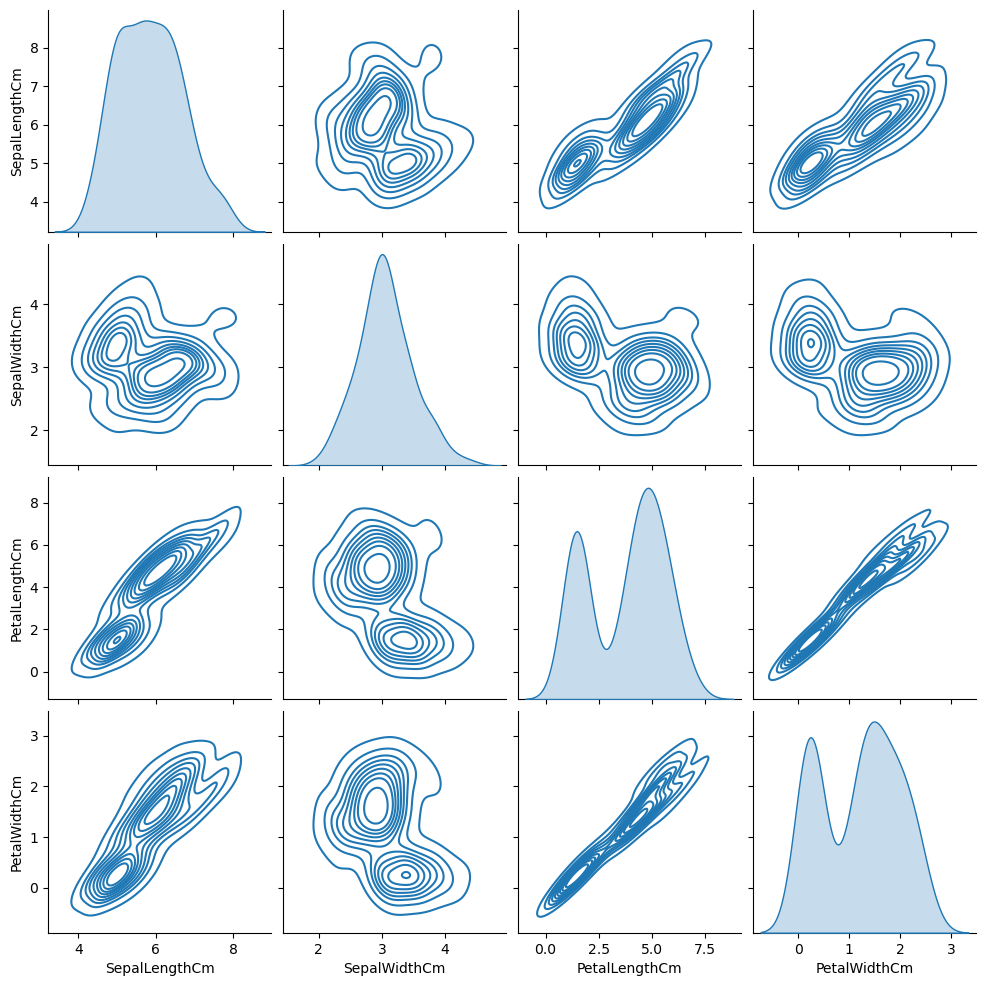

In [22]:
sns.pairplot(dataset, kind = "kde")

Building the model

In [23]:
#import the  class
from sklearn.linear_model import LogisticRegression

In [24]:
# init the model
lor_model = LogisticRegression(multi_class = "ovr")

In [25]:
lor_model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

Prediction

In [26]:
y_pred = lor_model.predict(X_test)

In [27]:
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

Evaluate the classification model

Accuracy Score

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [29]:
#accuracy_score = no of correct prediction/ total no of prediction
print("Test Accuracy Score:", accuracy_score(y_test, y_pred)*100, "%")

Test Accuracy Score: 96.66666666666667 %


In [30]:
y_pred_train = lor_model.predict(X_train)

In [31]:
print("Train Accuracy Score:", accuracy_score(y_train, y_pred_train)*100, "%")

Train Accuracy Score: 94.16666666666667 %


In [32]:
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [33]:
from mlxtend.plotting import plot_confusion_matrix

In [34]:
cm_test = confusion_matrix(y_test, y_pred)

In [35]:
cm_test

array([[10,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  7]], dtype=int64)

In [37]:
dataset["Species"].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

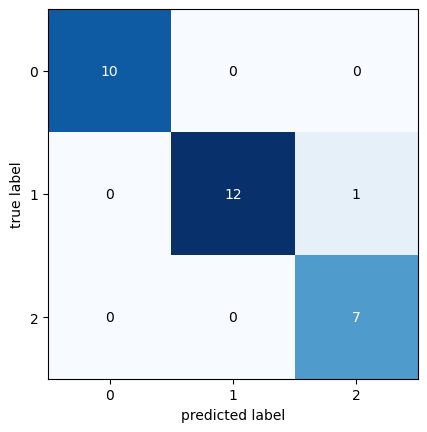

In [38]:
plot_confusion_matrix(cm_test)

In [39]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [43]:
print(classification_report(y_train, y_pred_train))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.94      0.86      0.90        37
 Iris-virginica       0.89      0.95      0.92        43

       accuracy                           0.94       120
      macro avg       0.94      0.94      0.94       120
   weighted avg       0.94      0.94      0.94       120



Real Time Prediction


In [45]:
X.iloc[110,:]


SepalLengthCm    6.5
SepalWidthCm     3.2
PetalLengthCm    5.1
PetalWidthCm     2.0
Name: 110, dtype: float64

In [46]:
data = list(X.iloc[110, :])

In [47]:
data


[6.5, 3.2, 5.1, 2.0]

In [48]:
data = np.array([data])

In [49]:
data


array([[6.5, 3.2, 5.1, 2. ]])

In [50]:
lor_model.predict(data)

C:\Users\sandh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Iris-virginica'], dtype=object)

In [51]:
y.iloc[110]

'Iris-virginica'